In [3]:
# importing all the required libraries

!pip install tensorflow-datasets
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import california_housing
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load and prepare the data

In [18]:
data=california_housing.load_data()
(X_train,y_train),(X_test,y_test)=data

In [19]:
X_train.shape

(16512, 8)

In [20]:
y_train.shape

(16512,)

In [21]:
import pandas as pd
df=pd.DataFrame(X_train)   # converting the x train into dataframe
print(df.head())

            0          1     2       3      4       5      6        7
0 -118.269997  34.090000  52.0  2327.0  555.0  1048.0  491.0   3.7847
1 -118.360001  33.959999  21.0  1802.0  556.0  1286.0  557.0   2.7284
2 -122.389999  37.759998  52.0  1877.0  427.0   712.0  398.0   3.9722
3 -117.949997  33.919998  11.0  3127.0  706.0  1594.0  694.0   4.3426
4 -122.519997  37.919998  24.0   421.0   64.0   163.0   75.0  14.5833


In [22]:
df.columns  # printing the columns

RangeIndex(start=0, stop=8, step=1)

In [24]:
# check the information about the datset if there any null vaules available or not
df.info()  # here X_train is df to check all the null values or information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16512 non-null  float32
 1   1       16512 non-null  float32
 2   2       16512 non-null  float32
 3   3       16512 non-null  float32
 4   4       16512 non-null  float32
 5   5       16512 non-null  float32
 6   6       16512 non-null  float32
 7   7       16512 non-null  float32
dtypes: float32(8)
memory usage: 516.1 KB


In [25]:
# print the shape of the train,test dataset

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (16512, 8)
y_train shape: (16512,)
X_test shape: (4128, 8)


In [26]:
# now we will scale the dataset using StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [27]:
X_train  # scaled

array([[ 0.6457759 , -0.7209302 ,  1.8532751 , ..., -0.3331862 ,
        -0.02698459, -0.04505231],
       [ 0.60079885, -0.78197217, -0.60761106, ..., -0.12736216,
         0.14330861, -0.6016902 ],
       [-1.4130851 ,  1.0023171 ,  1.8532751 , ..., -0.62376136,
        -0.2669432 ,  0.05375447],
       ...,
       [-1.3880974 ,  0.9131032 ,  1.8532751 , ..., -0.481933  ,
        -0.36757097,  2.313189  ],
       [-1.3081437 ,  1.063359  , -0.8457613 , ...,  0.17359067,
         0.600004  ,  2.254748  ],
       [ 0.56581837, -0.66927946,  0.02745632, ...,  0.43995124,
         0.45809302, -0.39965007]], dtype=float32)

In [37]:
# Build an ann model

model=Sequential()

model.add(Dense(64,input_shape=(X_train.shape[1],), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(8,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(optimizer='Adam',loss='mse',metrics=['mse'])

In [42]:
# train the model

train=model.fit(X_train,y_train,epochs=30,batch_size=32)

Epoch 1/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5596568576.0000 - mse: 5596568576.0000
Epoch 2/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5575351296.0000 - mse: 5575351296.0000
Epoch 3/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5405864448.0000 - mse: 5405864448.0000
Epoch 4/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5703954944.0000 - mse: 5703954944.0000
Epoch 5/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5817087488.0000 - mse: 5817087488.0000
Epoch 6/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5592145920.0000 - mse: 5592145920.0000
Epoch 7/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5456093696.0000 - mse: 5456093696.0000
Epoch 8/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5600186368.0000 - mse: 5600186368.0000
Epoch 9/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5602483200.0000 - mse: 5602483200.0000
Epoch 10/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5660884480.0000 - mse: 5660884480.0000
Epoch 11/

In [50]:
train.history.keys()

dict_keys(['loss', 'mse'])

In [49]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error on the test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on the test set: {mse:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error on the test set: 3257389568.0000


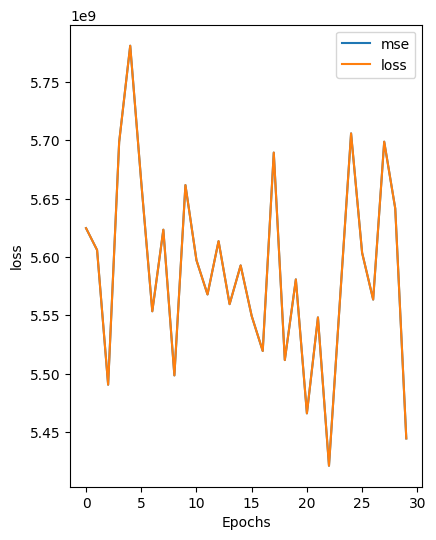

In [48]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.plot(train.history['mse'],label='mse')
plt.plot(train.history['loss'],label='loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()